In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from astropy.io import fits
import lightkurve as lk
import random

random.seed(5731)

In [3]:
# data1 = fits.open('TESS/tess2021014023720-s0034-0000000001003831-0204-s_tp.fits')
# data1.info()
data2 = fits.open('TESS/tess2021014023720-s0034-0000000001003831-0204-s_lc.fits')
data2.info()
# data3 = fits.open('TESS/tess2021014055109-s0034-s0034-0000000001003831-00444_dvt.fits')
# data3.info()

Filename: TESS/tess2021014023720-s0034-0000000001003831-0204-s_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   18231R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


In [4]:
with fits.open('TESS/tess2021014023720-s0034-0000000001003831-0204-s_lc.fits') as data:
    lc = pd.DataFrame(data[1].data)

In [5]:
print(lc)

              TIME  TIMECORR  CADENCENO     SAP_FLUX  SAP_FLUX_ERR  \
0      2228.749744  0.004396     720929          NaN           NaN   
1      2228.751133  0.004396     720930          NaN           NaN   
2      2228.752521  0.004397     720931          NaN           NaN   
3      2228.753910  0.004397     720932          NaN           NaN   
4      2228.755299  0.004397     720933          NaN           NaN   
...            ...       ...        ...          ...           ...   
18226  2254.064045  0.004821     739155  7771.084961     11.317918   
18227  2254.065434  0.004821     739156  7780.527344     11.319644   
18228  2254.066823  0.004821     739157  7772.279297     11.325295   
18229  2254.068212  0.004821     739158  7781.495117     11.323637   
18230  2254.069601  0.004821     739159  7773.767578     11.316874   

           SAP_BKG  SAP_BKG_ERR  PDCSAP_FLUX  PDCSAP_FLUX_ERR  QUALITY  \
0              NaN          NaN          NaN              NaN       40   
1          

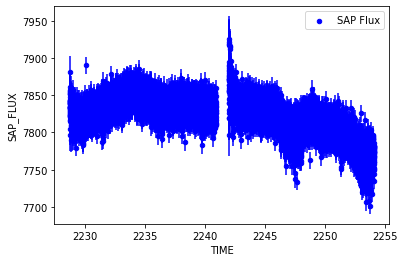

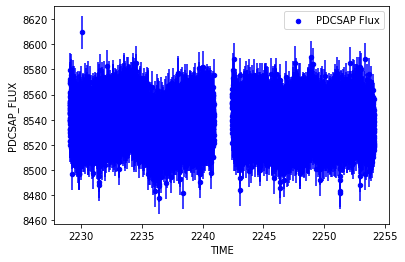

In [6]:
ax1 = lc.plot(x='TIME', y='SAP_FLUX', yerr='SAP_FLUX_ERR', kind='scatter', color='blue', label='SAP Flux') #raw data
ax2 = lc.plot(x='TIME', y='PDCSAP_FLUX', yerr='PDCSAP_FLUX_ERR', kind='scatter', color='blue', label='PDCSAP Flux') #normalized data

In [15]:
#finding the average
yavg = np.mean(lc['PDCSAP_FLUX'])
print(yavg)

8537.8935546875


In [25]:
# initialize list of lists
time_depth = []

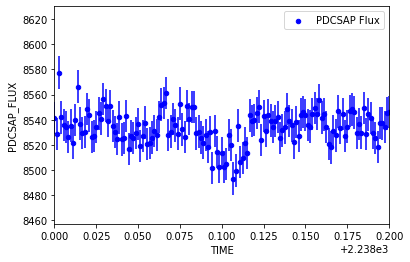

In [39]:
#using the flux from the cleaned/pdcsap lc
ax3 = lc.plot(x='TIME', y='PDCSAP_FLUX', yerr='PDCSAP_FLUX_ERR', xlim=(2238., 2238.2), kind='scatter', color='blue', label='PDCSAP Flux')
#ax3.hlines(y=yavg, xmin=2229.7, xmax=2230, color='r', linestyle='--')

40.9853515625
2229.701167073906


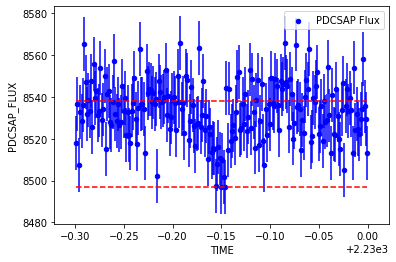

In [42]:
transit1 = lc[(lc['TIME'] >= 2229.7) & (lc['TIME'] <= 2230)]
t1 = transit1.plot(x='TIME', y='PDCSAP_FLUX', yerr='PDCSAP_FLUX_ERR',kind='scatter', color='blue', label='PDCSAP Flux')
t1.hlines(y=yavg, xmin=np.min(transit1['TIME']), xmax=np.max(transit1['TIME']), color='r', linestyle='--', label='average flux')
t1.hlines(y=np.min(transit1['PDCSAP_FLUX']), xmin=np.min(transit1['TIME']), xmax=np.max(transit1['TIME']), color='r', linestyle='--', label='botton of transit')

t1_depth = yavg-np.min(transit1['PDCSAP_FLUX'])
t1_time = np.interp(np.min(transit1['PDCSAP_FLUX']), transit1['PDCSAP_FLUX'], transit1['TIME'])
print(t1_depth)
print(t1_time)
time_depth.append([t1_time, t1_depth])

49.9755859375
2231.301223061671


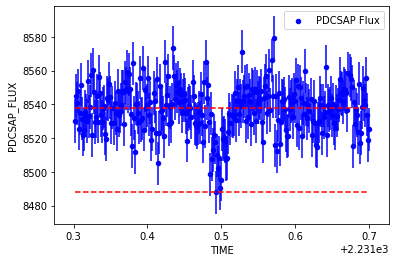

In [43]:
transit2 = lc[(lc['TIME'] >= 2231.3) & (lc['TIME'] <= 2231.7)]
t2 = transit2.plot(x='TIME', y='PDCSAP_FLUX', yerr='PDCSAP_FLUX_ERR',kind='scatter', color='blue', label='PDCSAP Flux')
t2.hlines(y=yavg, xmin=np.min(transit2['TIME']), xmax=np.max(transit2['TIME']), color='r', linestyle='--', label='average flux')
t2.hlines(y=np.min(transit2['PDCSAP_FLUX']), xmin=np.min(transit2['TIME']), xmax=np.max(transit2['TIME']), color='r', linestyle='--', label='botton of transit')
t2_depth = yavg-np.min(transit2['PDCSAP_FLUX'])
t2_time = np.interp(np.min(transit2['PDCSAP_FLUX']), transit2['PDCSAP_FLUX'], transit2['TIME'])
print(t2_depth)
print(t2_time)
time_depth.append([t2_time, t2_depth])

37.0107421875
2233.0512786763416


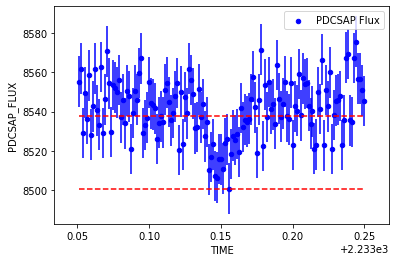

In [44]:
transit3 = lc[(lc['TIME'] >= 2233.05) & (lc['TIME'] <= 2233.25)]
t3 = transit3.plot(x='TIME', y='PDCSAP_FLUX', yerr='PDCSAP_FLUX_ERR',kind='scatter', color='blue', label='PDCSAP Flux')
t3.hlines(y=yavg, xmin=np.min(transit3['TIME']), xmax=np.max(transit3['TIME']), color='r', linestyle='--', label='average flux')
t3.hlines(y=np.min(transit3['PDCSAP_FLUX']), xmin=np.min(transit3['TIME']), xmax=np.max(transit3['TIME']), color='r', linestyle='--', label='botton of transit')
t3_depth = yavg-np.min(transit3['PDCSAP_FLUX'])
t3_time = np.interp(np.min(transit3['PDCSAP_FLUX']), transit3['PDCSAP_FLUX'], transit3['TIME'])
print(t3_depth)
print(t3_time)
time_depth.append([t3_time, t3_depth])

31.2294921875
2234.70132563396


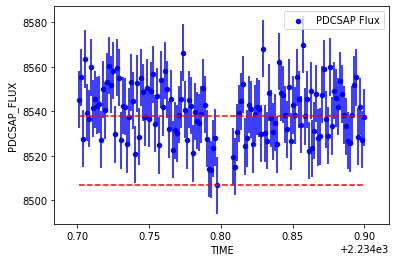

In [45]:
transit4 = lc[(lc['TIME'] >= 2234.7) & (lc['TIME'] <= 2234.9)]
t4 = transit4.plot(x='TIME', y='PDCSAP_FLUX', yerr='PDCSAP_FLUX_ERR',kind='scatter', color='blue', label='PDCSAP Flux')
t4.hlines(y=yavg, xmin=np.min(transit4['TIME']), xmax=np.max(transit4['TIME']), color='r', linestyle='--', label='average flux')
t4.hlines(y=np.min(transit4['PDCSAP_FLUX']), xmin=np.min(transit4['TIME']), xmax=np.max(transit4['TIME']), color='r', linestyle='--', label='botton of transit')
t4_depth = yavg-np.min(transit4['PDCSAP_FLUX'])
t4_time = np.interp(np.min(transit4['PDCSAP_FLUX']), transit4['PDCSAP_FLUX'], transit4['TIME'])
print(t4_depth)
print(t4_time)
time_depth.append([t4_time, t4_depth])

59.8701171875
2236.3513671628966


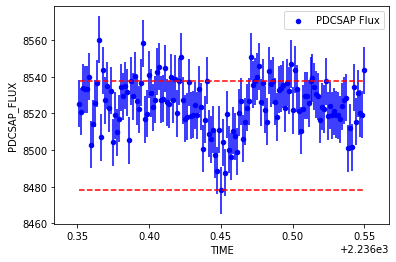

In [47]:
transit5 = lc[(lc['TIME'] >= 2236.35) & (lc['TIME'] <= 2236.55)]
t5 = transit5.plot(x='TIME', y='PDCSAP_FLUX', yerr='PDCSAP_FLUX_ERR',kind='scatter', color='blue', label='PDCSAP Flux')
t5.hlines(y=yavg, xmin=np.min(transit5['TIME']), xmax=np.max(transit5['TIME']), color='r', linestyle='--', label='average flux')
t5.hlines(y=np.min(transit5['PDCSAP_FLUX']), xmin=np.min(transit5['TIME']), xmax=np.max(transit5['TIME']), color='r', linestyle='--', label='botton of transit')
t5_depth = yavg-np.min(transit5['PDCSAP_FLUX'])
t5_time = np.interp(np.min(transit5['PDCSAP_FLUX']), transit5['PDCSAP_FLUX'], transit5['TIME'])
print(t5_depth)
print(t5_time)
time_depth.append([t5_time, t5_depth])

44.5517578125
2238.000014030759


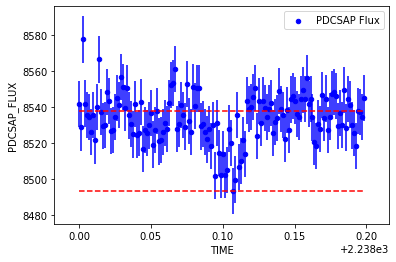

In [48]:
transit6 = lc[(lc['TIME'] >= 2238.) & (lc['TIME'] <= 2238.2)]
t6 = transit6.plot(x='TIME', y='PDCSAP_FLUX', yerr='PDCSAP_FLUX_ERR',kind='scatter', color='blue', label='PDCSAP Flux')
t6.hlines(y=yavg, xmin=np.min(transit6['TIME']), xmax=np.max(transit6['TIME']), color='r', linestyle='--', label='average flux')
t6.hlines(y=np.min(transit6['PDCSAP_FLUX']), xmin=np.min(transit6['TIME']), xmax=np.max(transit6['TIME']), color='r', linestyle='--', label='botton of transit')
t6_depth = yavg-np.min(transit6['PDCSAP_FLUX'])
t6_time = np.interp(np.min(transit6['PDCSAP_FLUX']), transit6['PDCSAP_FLUX'], transit6['TIME'])
print(t6_depth)
print(t6_time)
time_depth.append([t6_time, t6_depth])

47.52734375
2239.650043296961


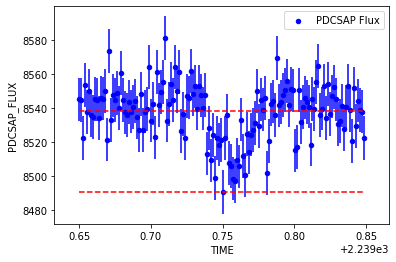

In [49]:
transit7 = lc[(lc['TIME'] >= 2239.65) & (lc['TIME'] <= 2239.85)]
t7 = transit7.plot(x='TIME', y='PDCSAP_FLUX', yerr='PDCSAP_FLUX_ERR',kind='scatter', color='blue', label='PDCSAP Flux')
t7.hlines(y=yavg, xmin=np.min(transit7['TIME']), xmax=np.max(transit7['TIME']), color='r', linestyle='--', label='average flux')
t7.hlines(y=np.min(transit7['PDCSAP_FLUX']), xmin=np.min(transit7['TIME']), xmax=np.max(transit7['TIME']), color='r', linestyle='--', label='botton of transit')
t7_depth = yavg-np.min(transit7['PDCSAP_FLUX'])
t7_time = np.interp(np.min(transit7['PDCSAP_FLUX']), transit7['PDCSAP_FLUX'], transit7['TIME'])
print(t7_depth)
print(t7_time)
time_depth.append([t7_time, t7_depth])

In [50]:
# # initialize list of lists
# time_depth = []
# # How to append transit info to list 'time_depth'
# time_depth.append([2250, 4])
# Create the pandas DataFrame
transit_depth = pd.DataFrame(time_depth, columns=['Time', 'Depth'])
# print dataframe.
transit_depth

,Time,Depth
0,2229.701167,40.985352
1,2231.301223,49.975586
2,2233.051279,37.010742
3,2234.701326,31.229492
4,2236.351367,59.870117
5,2238.000014,44.551758
6,2239.650043,47.527344
